In [31]:
!pip install fastcluster


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [47]:
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [22]:
df = pd.read_csv('../../mediadive/ingredient_overlap_dist.txt', sep='\t')
df

,Solution_medium_1,Solution_medium_2,Overlap_%
0,mediadive.medium:442,mediadive.solution:5614,100.0
1,mediadive.medium:442,mediadive.solution:898,100.0
2,mediadive.medium:464,mediadive.solution:944,100.0
3,mediadive.medium:514,mediadive.solution:1550,100.0
4,mediadive.solution:10,mediadive.solution:9,100.0
...,...,...,...
1048570,mediadive.solution:248,mediadive.solution:64,28.0
1048571,mediadive.solution:248,mediadive.solution:715,28.0
1048572,mediadive.solution:248,mediadive.solution:808,28.0
1048573,mediadive.solution:248,mediadive.solution:996,28.0


In [36]:
matrix_df = df.pivot(index='Solution_medium_1', columns='Solution_medium_2', values='Overlap_%')
matrix_df

Solution_medium_2,mediadive.medium:1005,mediadive.medium:1010,mediadive.medium:1011,mediadive.medium:1011a,mediadive.medium:1011b,mediadive.medium:1011c,mediadive.medium:1011d,mediadive.medium:1012a,mediadive.medium:1013,mediadive.medium:1020,...,mediadive.solution:99,mediadive.solution:990,mediadive.solution:991,mediadive.solution:992,mediadive.solution:993,mediadive.solution:994,mediadive.solution:995,mediadive.solution:996,mediadive.solution:997,mediadive.solution:999
Solution_medium_1,,,,,,,,,,,,,,,,,,,,,
mediadive.medium:1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediadive.medium:1002,NaN,NaN,NaN,NaN,41.67,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediadive.medium:1004,70.0,59.26,70.00,70.00,51.85,66.67,70.00,NaN,31.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediadive.medium:1005,NaN,51.85,77.78,77.78,56.00,73.68,77.78,NaN,35.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediadive.medium:1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mediadive.solution:992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.74,NaN,NaN,NaN,NaN,NaN
mediadive.solution:994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,47.37,30.43,28.57,NaN
mediadive.solution:995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,33.33,NaN


In [50]:
matrix_df.min

<bound method DataFrame.min of                         mediadive.medium:1  mediadive.medium:1002  \
mediadive.medium:1                     NaN                    NaN   
mediadive.medium:1002                  NaN                    NaN   
mediadive.medium:1004                  NaN                    NaN   
mediadive.medium:1005                  NaN                    NaN   
mediadive.medium:1009                  NaN                    NaN   
...                                    ...                    ...   
mediadive.solution:995                 NaN                    NaN   
mediadive.solution:996                 NaN                    NaN   
mediadive.solution:997                 NaN                    NaN   
mediadive.solution:998                 NaN                    NaN   
mediadive.solution:999                 NaN                    NaN   

                        mediadive.medium:1004  mediadive.medium:1005  \
mediadive.medium:1                        NaN                    NaN

In [38]:
# Ensure all row labels exist as columns and all column labels exist as rows
matrix_df = matrix_df.reindex(index=matrix_df.columns.union(matrix_df.index), 
                              columns=matrix_df.index.union(matrix_df.columns), 
                              fill_value=np.nan)

In [39]:
transposed_df = matrix_df.T

# Use combine_first to fill in NaN values in the transposed DataFrame 
# with values from the original DataFrame. This effectively mirrors the 
# non-NaN values from the upper triangle to the lower triangle of the matrix.
symmetric_df = transposed_df.combine_first(matrix_df)

In [17]:
###SLOW

## Iterate over the DataFrame to make it symmetric
#for i in matrix_df.index:
#    for j in matrix_df.columns:
#        # Check if the current (i, j) position has a value
#        if pd.notna(matrix_df.at[i, j]):
#            # Set the (j, i) position to the value of (i, j) if it's NaN
#            if pd.isna(matrix_df.at[j, i]):
#                matrix_df.at[j, i] = matrix_df.at[i, j]

In [40]:
symmetric_df_0s = symmetric_df.fillna(0, inplace=False)

In [56]:
symmetric_df_0s_dist = 1.0 - (symmetric_df_0s/100.0)

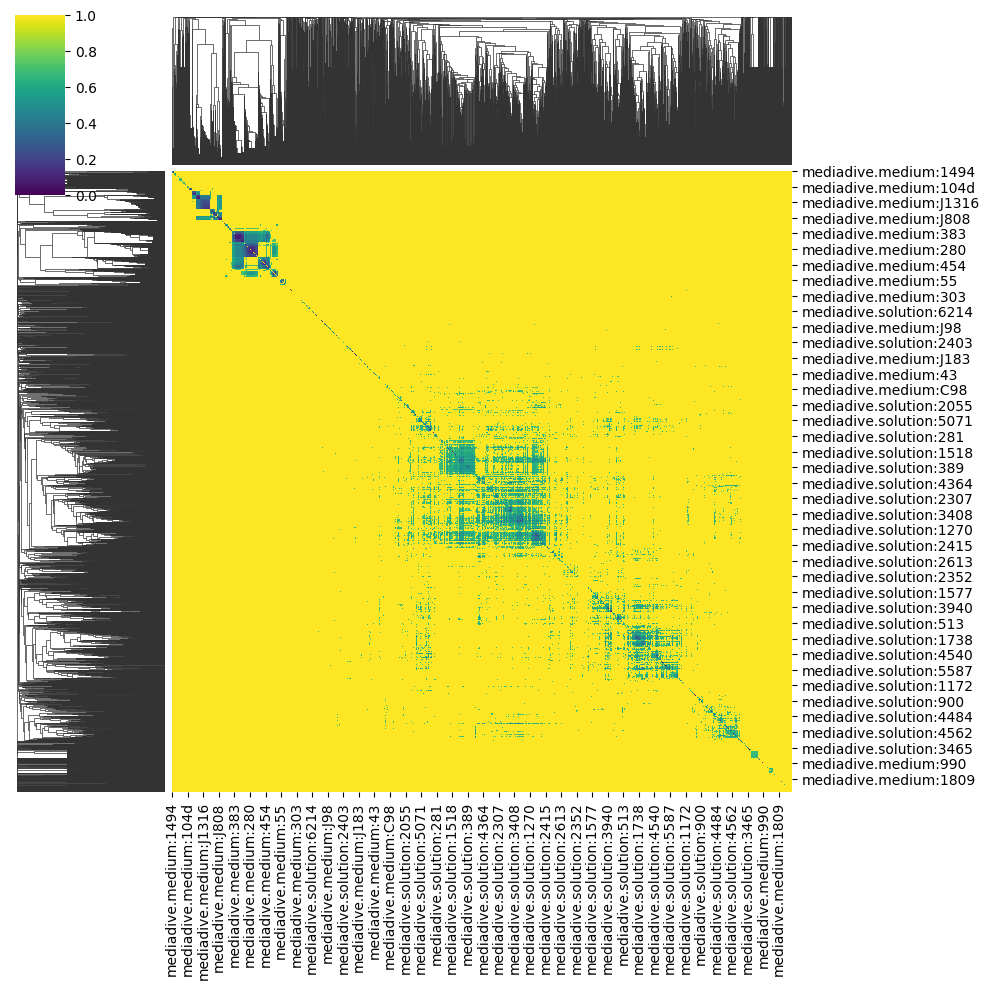

CPU times: user 23min 21s, sys: 49.2 s, total: 24min 10s
Wall time: 26min 18s


In [57]:
%%time
symmetric_df_0s_condense = squareform(symmetric_df_0s_dist, checks=False)
symmetric_df_0s_link = hierarchy.linkage(symmetric_df_0s_condense, method='average')

# Create a clustered heatmap using the precomputed distance matrix
clustergrid = sns.clustermap(symmetric_df_0s_dist, method='average', 
                             row_linkage=symmetric_df_0s_link, col_linkage=symmetric_df_0s_link, 
                             cmap='viridis', figsize=(10, 10))

# Save the plot to PNG and PDF
clustergrid.savefig("cluster_ingredients.png")
clustergrid.savefig("cluster_ingredients.pdf")

# Save the ClusterGrid object
with open('cluster_ingredients.pkl', 'wb') as file:
    pickle.dump(clustergrid, file)

# Uncomment to read the saved object
# with open('clustergrid.pkl', 'rb') as file:
#     loaded_clustergrid = pickle.load(file)

# Display the plot
plt.show()